In [84]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
from sympy.abc import x,y,z,s
from sympy.plotting import plot
xvar = sy.Symbol('x',real=True)

In [85]:
class wave:
    __slots__ = ('loc',)
    x = sy.Symbol('x',real=True)
    def __init__(self,loc=0):
        self.loc = loc
#         self.x = x + self.loc
        
    def __rshift__(self, time):
        return wave(self.loc+time)

    def __lshift__(self, time):
        return self >> (-time)
    
    def step(self,center=0):
        return (sy.sign(x-center-self.loc)+1)/2

    def cos(self,w):
        return sy.cos(2*sy.pi*x*w)

    def square(self,during):
        return  self.step(-during/2) - self.step(during/2)

    def cospulse(self,during):
        return self.square(during)*(-self.cos(2*sy.pi/during)+1)/2

<IPython.core.display.Javascript object>


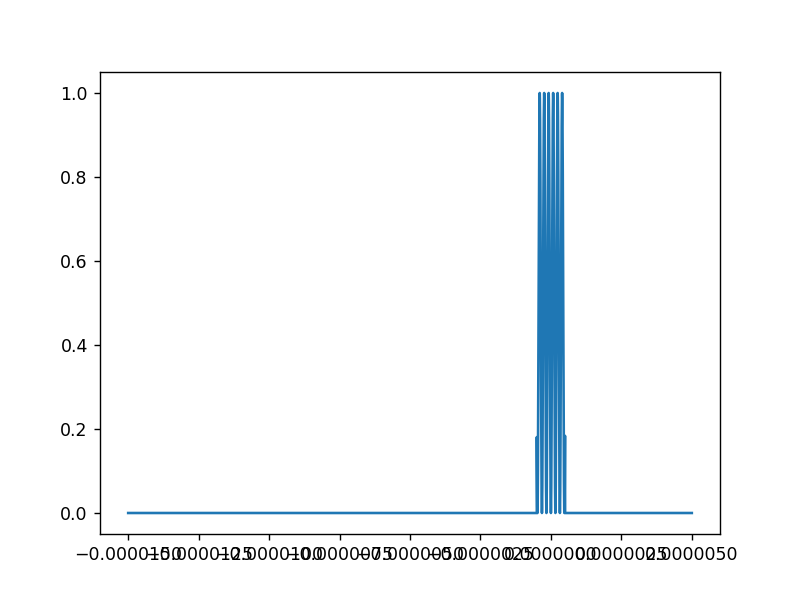

In [89]:
w = wave() << 0
func = w.cospulse(1000e-9)
t = np.linspace(-15000,5000,50000)*1e-9
y = sy.lambdify(xvar,func,'numpy')
plt.plot(t,y(t))
# b1 = plot(func,nb_of_points=10001)

In [34]:
def step(x,center=0):
    return (sy.sign(x-center)+1)/2

def cos(x,T):
    return (sy.cos(2*sy.pi*x/T)+1)/2

def square(x,width):
    return  step(x) - step(x,width)

def cospulse(x,T):
    return square(x,T)*(-cos(x,T)+1)/2

In [14]:
func = step(xvar)
y = sy.lambdify(xvar,func,'numpy')

<IPython.core.display.Javascript object>


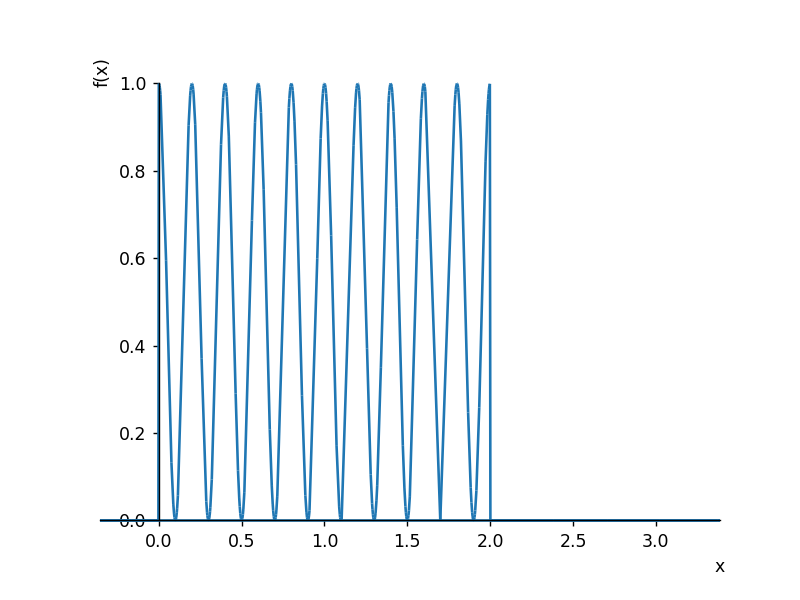

In [40]:
b1 = plot(square(xvar,2)*cos(xvar,0.2),nb_of_points=10001)

In [38]:
%matplotlib notebook

In [41]:
class Waveform:
    __slots__ = ('bounds', 'seq')

    def __init__(self, bounds=(+np.inf, ), seq=(_zero, )):
        self.bounds = bounds
        self.seq = seq

    def _comb(self, other, oper):
        bounds = []
        seq = []
        i1, i2 = 0, 0
        h1, h2 = len(self.bounds), len(other.bounds)
        while i1 < h1 or i2 < h2:
            seq.append(oper(self.seq[i1], other.seq[i2]))
            b = min(self.bounds[i1], other.bounds[i2])
            bounds.append(b)
            if b == self.bounds[i1]:
                i1 += 1
            if b == other.bounds[i2]:
                i2 += 1
        return Waveform(tuple(bounds), tuple(seq))

    def __pow__(self, n):
        return Waveform(self.bounds, tuple(_pow(w, n) for w in self.seq))

    def __add__(self, other):
        if isinstance(other, Waveform):
            return self._comb(other, _add)
        else:
            return self + const(other)

    def __radd__(self, v):
        return const(v) + self

    def append(self, other):
        if not isinstance(other, Waveform):
            raise TypeError('connect Waveform by other type')
        if len(self.bounds) == 1:
            self.bounds = other.bounds
            self.seq = self.seq + other.seq[1:]
            return

        assert self.bounds[-2] <= other.bounds[
            0], f"connect waveforms with overlaped domain {self.bounds}, {other.bounds}"
        if self.bounds[-2] < other.bounds[0]:
            self.bounds = self.bounds[:-1] + other.bounds
            self.seq = self.seq + other.seq[1:]
        else:
            self.bounds = self.bounds[:-2] + other.bounds
            self.seq = self.seq[:-1] + other.seq[1:]

    def __ior__(self, other):
        self.append(other)
        return self

    def __or__(self, other):
        w = Waveform(self.bounds, self.seq)
        w.append(other)
        return w

    def __mul__(self, other):
        if isinstance(other, Waveform):
            return self._comb(other, _mul)
        else:
            return self * const(other)

    def __rmul__(self, v):
        return const(v) * self

    def __truediv__(self, other):
        if isinstance(other, Waveform):
            raise TypeError('division by waveform')
        else:
            return self * const(1 / other)

    def __neg__(self):
        return -1 * self

    def __sub__(self, other):
        return self + (-other)

    def __rsub__(self, v):
        return v + (-self)

    def __rshift__(self, time):
        return Waveform(tuple(bound + time for bound in self.bounds),
                        tuple(_shift(expr, time) for expr in self.seq))

    def __lshift__(self, time):
        return self >> (-time)

    def __call__(self, x):
        range_list = np.searchsorted(x, self.bounds)
        ret = np.zeros(x.shape)
        start, stop = 0, 0
        for i, stop in enumerate(range_list):
            if start < stop and self.seq[i] != _zero:
                ret[start:stop] = _calc(self.seq[i], x[start:stop])
            start = stop
        return ret

    def __hash__(self):
        return hash((self.bounds, self.seq))
    

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [70]:
type(sy.sign)

sympy.core.function.FunctionClass